# Unit 3: Probability Theory in Engineering


## Overview
This notebook contains practical exercises for understanding probability concepts and to demostrate their practical applications - using data from the Intel Lab sensor dataset.

Learning Objectives:
- Basic probability calculations
- Law of large numbers demonstration with real measurements
-  Conditional probability in sensor systems
- Cross tabulation analysis
- Practical application of combinatorics



## Key Concepts

### 1. Basic Probability
- **Sample Space (Ω)**: Set of all possible outcomes
- **Event**: Subset of the sample space
- **Probability Properties**:
  - 0 ≤ P(A) ≤ 1 for any event A
  - P(Ω) = 1 (total probability)
  - P(A ∪ B) = P(A) + P(B) - P(A ∩ B)

### 2. Probability Rules
- **Addition Rule**: P(A or B) = P(A) + P(B) - P(A and B)
- **Complement Rule**: P(not A) = 1 - P(A)
- **Multiplication Rule**: 
  - Independent events: P(A and B) = P(A) × P(B)
  - General case: P(A and B) = P(A|B) × P(B)

### 3. Conditional Probability
- P(A|B) = P(A and B) / P(B)
- **Bayes' Theorem**:
  P(A|B) = P(B|A)P(A) / P(B)
- **Independence**: Events A and B are independent if P(A|B) = P(A)

### 4. Law of Large Numbers
- As number of trials increases, sample mean approaches expected value
- Key aspects:
  - Convergence to true probability
  - Rate of convergence varies
  - Requires independent trials

### 5. Cross Tabulation (Cross Tabs)
- Displays relationship between two categorical variables
- Used for:
  - Analyzing dependencies
  - Calculating conditional probabilities
  - Visualizing joint distributions

## Key Formulas to Remember

1. **Basic Probability**:
   - P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
   - P($\text{A}^c$) = 1 - P(A)

2. **Conditional Probability**:
   - P(A|B) = P(A ∩ B) / P(B)
   - P(A ∩ B) = P(A|B) × P(B)

3. **Independence**:
   - P(A ∩ B) = P(A) × P(B)

4. **Bayes' Theorem**:
   - P(A|B) = P(B|A)P(A) / P(B)

In [33]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configure plotting
# Set Seaborn style for better visualizations
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = [10, 6]

# Set random seed
np.random.seed(42)

### Exercise 1: Component Reliability
**Context**: Power supply reliability testing

A power supply unit has three key components (A, B, C) in series. Component failure probabilities are:
- Component A: 2% failure rate
- Component B: 3% failure rate 
- Component C: 1% failure rate

Tasks:
1. Calculate the probability that the power supply works (all components must work)
2. Given the power supply failed, calculate the conditional probability that component B failed


In [36]:
"""
Calculate reliability of a power supply with components in series.
"""
# Component failure rates
p_A_fail = 0.02
p_B_fail = 0.03
p_C_fail = 0.01

# Calculate success probabilities
p_A_success = 1 - p_A_fail
p_B_success = 1 - p_B_fail
p_C_success = 1 - p_C_fail

# Calculate total success probability (all components must work)
p_system_success = p_A_success * p_B_success * p_C_success

# Calculate conditional probability of B failure given system failure
p_system_fail = 1 - p_system_success

# Calculate P(B and System fail) considering all scenarios
# p_B_fail_and_system_fail = (
#     (p_B_fail * p_A_success * p_C_success) +  # Only B fails
#     (p_B_fail * p_A_fail * p_C_success) +     # B and A fail
#     (p_B_fail * p_A_success * p_C_fail) +     # B and C fail
#     (p_B_fail * p_A_fail * p_C_fail)          # All fail
# )

p_B_fail_and_system_fail = (p_B_fail * p_A_success * p_C_success) # Only B fails    

p_B_fail_given_system_fail = p_B_fail_and_system_fail / p_system_fail

print("\nExercise 1: Power Supply Reliability")
print(f"System success probability: {p_system_success:.4f}")
print(f"Probability of B failure given system failure: {p_B_fail_given_system_fail:.4f}")


Exercise 1: Power Supply Reliability
System success probability: 0.9411
Probability of B failure given system failure: 0.4941


### Exercise 2: Embedded System Testing

In embedded system testing:
- 80% of test cases run successfully
- 15% of test cases fail due to software bugs
- 5% of test cases fail due to hardware issues
- Among failed software tests, 30% are critical bugs

Tasks:
1. Create a complete probability tree diagram
2. Calculate the probability that a randomly selected test case:
   - Is either successful or has a critical bug
   - Has a non-critical software bug given that it failed



In [53]:
"""
Analyze test coverage probabilities.
"""
# Given probabilities

p_success = 0.8
p_software_fail = 0.15 
p_hardware_fail = 0.05
p_critical_given_software = 0.3

# Calculate requested probabilities
p_critical = p_critical_given_software * p_software_fail
p_success_or_critical = p_success +  p_critical

# Calculate probability of non-critical given failure
p_fail = 1 - p_success
p_noncritical_given_software = 1 - p_critical_given_software
p_noncritical_software = p_software_fail * p_noncritical_given_software
p_noncritical_given_fail = p_noncritical_software / p_fail

# Note: An explanation on this is provided below

print("\nExercise 2: Test Coverage Analysis")
print(f"Probability of success or critical bug: {p_success_or_critical:.4f}")
print(f"Probability of non-critical bug given failure: {p_noncritical_given_fail:.4f}")


Exercise 2: Test Coverage Analysis
Probability of success or critical bug: 0.8450
Probability of non-critical bug given failure: 0.5250


The formula in **Task 2b** is calculating a conditional probability:

$$
P(\text{Non-Critical | Failed}) = \frac{P(\text{Non-Critical and Failed})}{P(\text{Failed})}
$$

**The numerator** $P(\text{Non-Critical and Failed})$:
   - A failure occurs, and the cause is a software bug that is non-critical.
   - The probability of this event is:
     $$
     P(\text{Failure due to Software}) \times P(\text{Non-Critical | Software Failure})
     $$
     This is:
     $$
     P_{\text{failure\_software}} \times P_{\text{non-critical | software failure}}
     $$


### Exercise 3: Network Communication

A network sends 1000 data packets. Each packet has a 0.1% chance of being corrupted during transmission, independent of other packets.

Tasks:
1. Calculate the probability of exactly 2 corrupted packets
2. Calculate the probability of 3 or more corrupted packets
3. Using the law of large numbers, explain what happens to the relative frequency of corrupted packets as the number of transmitted packets increases

<!-- This covers:
- Binomial probability
- Law of large numbers
- Combinatorics -->

In [57]:
"""
Analyze packet corruption probabilities.
"""
n_packets=1000
p_corrupt=0.001

# Calculate probability of exactly 2 corrupted packets; hint: stats.binom.pmf(n_corrupt, n_packets, p_corrupt)
p_exactly_2 = stats.binom.pmf(2, n_packets, p_corrupt)

# Calculate probability of 3 or more corrupted packets

p_3_or_more = 1 - sum(stats.binom.pmf(k, n_packets, p_corrupt) for k in range(3))

# Simulate packet transmission to demonstrate law of large numbers

n_simulations = [100, 1000, 10000, 100000]
results = []

for n in n_simulations:
    corrupted = np.random.binomial(n, p_corrupt)
    results.append(corrupted / n)


print("\nExercise 3: Network Communication")
print(f"Probability of exactly 2 corrupted packets: {p_exactly_2:.4f}")
print(f"Probability of 3 or more corrupted packets: {p_3_or_more:.4f}")
print("\nLaw of Large Numbers Demonstration:")
for n, r in zip(n_simulations, results):
    print(f"Simulated corruption rate with {n} packets: {r:.4f}")



Exercise 3: Network Communication
Probability of exactly 2 corrupted packets: 0.1840
Probability of 3 or more corrupted packets: 0.0802

Law of Large Numbers Demonstration:
Simulated corruption rate with 100 packets: 0.0000
Simulated corruption rate with 1000 packets: 0.0000
Simulated corruption rate with 10000 packets: 0.0014
Simulated corruption rate with 100000 packets: 0.0008


### Understanding Binomial PMF (Probability Mass Function)

#### stats.binom.pmf(k, n, p)
probability = stats.binom.pmf(2, n_packets, p_corrupt)


#### Components:
1. **PMF**: Probability Mass Function - gives probability of exactly k successes
2. **Parameters**:
   - `k` = 2 (exactly 2 corrupted packets)
   - `n` = 1000 (total packets)
   - `p` = 0.001 (probability of single packet corruption)

#### The Formula:
The binomial PMF formula is:
```
P(X = k) = C(n,k) * p^k * (1-p)^(n-k)
```
where:
- C(n,k) is the number of ways to choose k items from n items
- p^k is the probability of k successes
- (1-p)^(n-k) is the probability of (n-k) failures


### Exercise 4: Sensor Data Analysis
**Context**: Intel Lab environmental monitoring system

The Intel Lab contains multiple sensors measuring:
- Temperature (°C)
- Humidity (%)
- Light levels (lux)
- Voltage levels (V)

Tasks:
1. Calculate basic probabilities of sensor events using both mean and fixed thresholds
2. Demonstrate Law of Large Numbers using temperature measurements
3. Analyze relationships between temperature and humidity using cross-tabulation
4. Investigate conditional probabilities between sensor readings

In [61]:
# Basic Probability with Sensor Readings
# ==============================================

def load_and_prepare_data():
    """Load Intel Lab sensor data"""
    data = pd.read_csv('processed_sensor_data.csv')
    data['datetime'] = pd.to_datetime(data['datetime'])
    return data

def calculate_basic_probabilities(data):
    """Calculate basic probabilities of sensor events"""
    # Define thresholds
    temp_mean = data['temperature'].mean()
    humid_mean = data['humidity'].mean()
    
    # Calculate probabilities
    p_high_temp = np.mean(data['temperature'] > temp_mean)
    p_high_humid = np.mean(data['humidity'] > humid_mean)
    p_both = np.mean((data['temperature'] > temp_mean) & 
                     (data['humidity'] > humid_mean))
    
    return {
        'P(High Temperature)': p_high_temp,
        'P(High Humidity)': p_high_humid,
        'P(Both High)': p_both
    }

# Law of Large Numbers
# ============================

def demonstrate_LLN(data, n_samples=[100, 500, 1000, 5000]):
    """Demonstrate Law of Large Numbers with temperature readings"""
    true_mean = data['temperature'].mean()
    
    results = []
    for n in n_samples:
        # Sample with replacement
        samples = data['temperature'].sample(n=n, replace=True)
        #We use sample() because: Temperature is continuous data (not binary - success or failure), 
        # and we're working with real measurements, not simulated binary outcomes
        sample_mean = samples.mean()
        results.append({
            'n': n,
            'sample_mean': sample_mean,
            'true_mean': true_mean,
            'difference': abs(sample_mean - true_mean)
        })
    
    return pd.DataFrame(results)

# Cross Tabulation Analysis
# ================================
def create_sensor_crosstab(data):
    """Create and analyze cross-tabulation of sensor data"""
    # Create binary categories
    data['temp_category'] = data['temperature'] > data['temperature'].mean()
    data['humid_category'] = data['humidity'] > data['humidity'].mean()
    
    # Create cross-tab
    cross_tab = pd.crosstab(
        index=data['temp_category'],
        columns=data['humid_category'],
        margins=True,
        normalize=True
    )
    
    return cross_tab

# Conditional Probability
# ==============================
def analyze_conditional_probabilities(data):
    """Analyze conditional probabilities in sensor readings"""
    # Define events
    high_temp = data['temperature'] > data['temperature'].mean()
    high_humid = data['humidity'] > data['humidity'].mean()
    
    # Calculate probabilities
    p_humid_given_temp = np.mean(high_humid[high_temp])
    p_humid = np.mean(high_humid)
    
    # Test independence
    are_independent = np.isclose(p_humid_given_temp, p_humid, rtol=0.1)
    
    return {
        'P(High Humidity | High Temperature)': p_humid_given_temp,
        'P(High Humidity)': p_humid,
        'Are Events Independent?': are_independent
    }


# Load data
print("Loading sensor data...")
data = load_and_prepare_data()

# Basic Probabilities
print("\n Basic Probabilities")
print("-" * 40)
basic_probs = calculate_basic_probabilities(data)
for event, prob in basic_probs.items():
    print(f"{event}: {prob:.3f}")

# Law of Large Numbers
print("\n Law of Large Numbers")
print("-" * 40)
lln_results = demonstrate_LLN(data)
print("Sample size vs. true mean difference:")
print(lln_results)

# Cross Tabulation
print("\n Cross Tabulation")
print("-" * 40)
cross_tab = create_sensor_crosstab(data)
print("\nCross Tabulation Results:")
print(cross_tab)

# Conditional Probability
print("\n Conditional Probability")
print("-" * 40)
cond_probs = analyze_conditional_probabilities(data)
for metric, value in cond_probs.items():
    print(f"{metric}: {value}")



Loading sensor data...

 Basic Probabilities
----------------------------------------
P(High Temperature): 0.365
P(High Humidity): 0.528
P(Both High): 0.138

 Law of Large Numbers
----------------------------------------
Sample size vs. true mean difference:
      n  sample_mean  true_mean  difference
0   100    22.202220  22.434444    0.232224
1   500    22.856448  22.434444    0.422004
2  1000    22.400621  22.434444    0.033823
3  5000    22.443273  22.434444    0.008829

 Cross Tabulation
----------------------------------------

Cross Tabulation Results:
humid_category     False      True       All
temp_category                               
False           0.244604  0.389999  0.634603
True            0.226923  0.138474  0.365397
All             0.471527  0.528473  1.000000

 Conditional Probability
----------------------------------------
P(High Humidity | High Temperature): 0.3789686884169039
P(High Humidity): 0.5284728472847284
Are Events Independent?: False


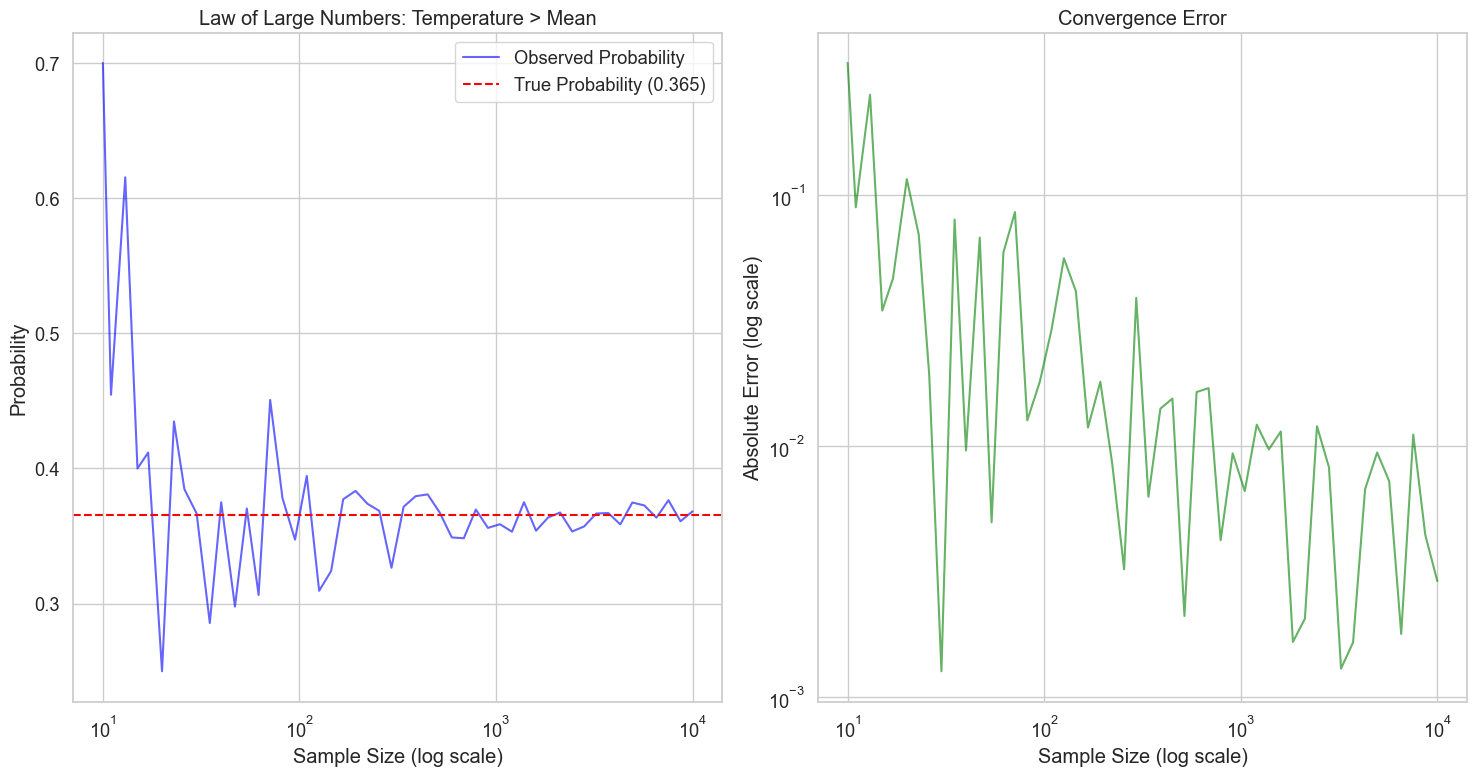


Law of Large Numbers Summary for Temperature > Mean
--------------------------------------------------
True Probability: 0.3654

Convergence at different sample sizes:
n=   10: P=0.7000 (error: 0.3346)
n=  100: P=0.3474 (error: 0.0180)
n= 1000: P=0.3588 (error: 0.0066)
n=10000: P=0.3683 (error: 0.0029)


In [63]:
def visualize_law_of_large_numbers(data, threshold_type='mean'):
    """
    Visualize Law of Large Numbers using sensor data
    
    Parameters:
    data : pd.DataFrame - sensor data
    threshold_type : str - 'mean' or 'fixed' for threshold type
    """
    # Set up the threshold
    if threshold_type == 'mean':
        threshold = data['temperature'].mean()
        event_name = 'Temperature > Mean'
    else:
        threshold = 25  # Fixed threshold of 25°C
        event_name = 'Temperature > 25°C'

    # Calculate true probability
    true_prob = np.mean(data['temperature'] > threshold)

    # Simulate increasing sample sizes
    sample_sizes = np.logspace(1, 4, 50).astype(int)  # 10 to 10000
    observed_probs = []

    for n in sample_sizes:
        sample = data['temperature'].sample(n=n, replace=True)
        observed_prob = np.mean(sample > threshold)
        observed_probs.append(observed_prob)

    # Create main plot
    plt.figure(figsize=(15, 8))

    # Plot 1: Convergence over sample size
    plt.subplot(1, 2, 1)
    plt.plot(sample_sizes, observed_probs, 'b-', alpha=0.6, label='Observed Probability')
    plt.axhline(y=true_prob, color='r', linestyle='--', label=f'True Probability ({true_prob:.3f})')
    plt.xscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Probability')
    plt.title(f'Law of Large Numbers: {event_name}')
    plt.grid(True)
    plt.legend()

    # Plot 2: Error vs sample size
    plt.subplot(1, 2, 2)
    errors = np.abs(np.array(observed_probs) - true_prob)
    plt.plot(sample_sizes, errors, 'g-', alpha=0.6)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Absolute Error (log scale)')
    plt.title('Convergence Error')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\nLaw of Large Numbers Summary for {event_name}")
    print("-" * 50)
    print(f"True Probability: {true_prob:.4f}")
    print("\nConvergence at different sample sizes:")
    for size in [10, 100, 1000, 10000]:
        idx = np.argmin(np.abs(sample_sizes - size))
        error = errors[idx]
        print(f"n={size:5d}: P={observed_probs[idx]:.4f} (error: {error:.4f})")

visualize_law_of_large_numbers(data, threshold_type='mean')

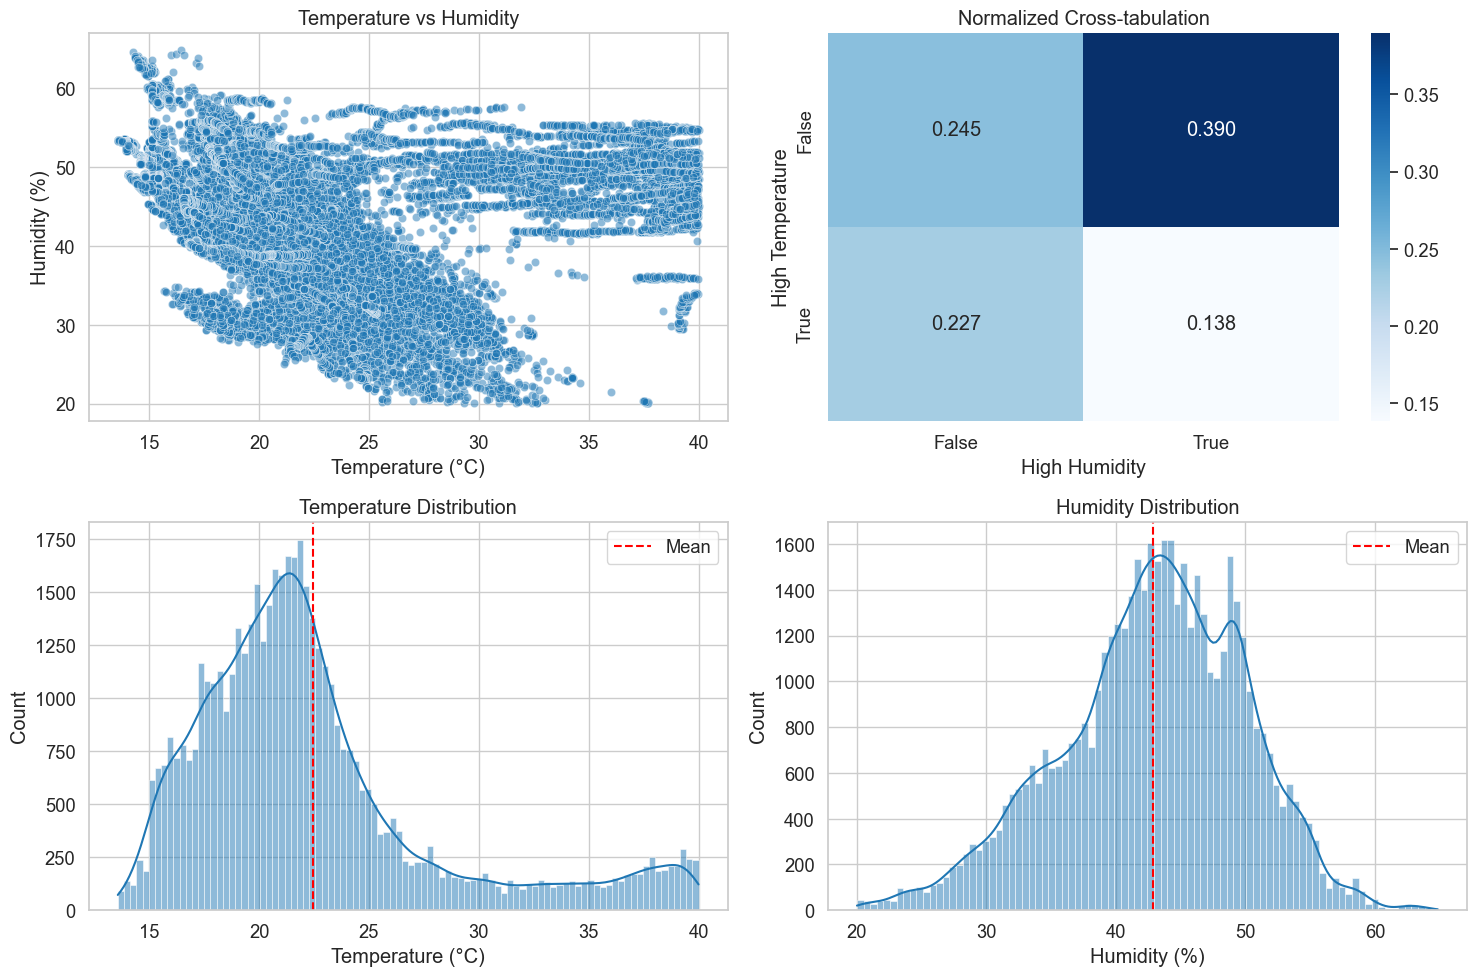


Correlation Analysis:
----------------------------------------
Temperature-Humidity Correlation: -0.113


In [65]:
"""Create comprehensive visualization of sensor relationships"""

plt.figure(figsize=(15, 10))

# Plot 1: Temperature vs Humidity Scatter
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='temperature', y='humidity', alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')

# Plot 2: Cross-tabulation Heatmap
plt.subplot(2, 2, 2)
temp_high = data['temperature'] > data['temperature'].mean()
humid_high = data['humidity'] > data['humidity'].mean()
cross_tab = pd.crosstab(temp_high, humid_high, normalize=True)
sns.heatmap(cross_tab, annot=True, fmt='.3f', cmap='Blues')
plt.title('Normalized Cross-tabulation')
plt.xlabel('High Humidity')
plt.ylabel('High Temperature')

# Plot 3: Temperature Distribution
plt.subplot(2, 2, 3)
sns.histplot(data['temperature'], kde=True)
plt.axvline(data['temperature'].mean(), color='r', linestyle='--', label='Mean')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.legend()

# Plot 4: Humidity Distribution
plt.subplot(2, 2, 4)
sns.histplot(data['humidity'], kde=True)
plt.axvline(data['humidity'].mean(), color='r', linestyle='--', label='Mean')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nCorrelation Analysis:")
print("-" * 40)
correlation = data['temperature'].corr(data['humidity'])
print(f"Temperature-Humidity Correlation: {correlation:.3f}")


# Choosing Thresholds for Probability Analysis in Engineering

## Overview
When analyzing sensor data or any measurements, choosing appropriate thresholds is crucial for meaningful probability calculations. Different threshold types serve different analytical purposes.

## 1. Mean as Threshold
### When to Use:
- Data is approximately normally distributed
- Equal probability of being above/below threshold is desired
- Analyzing typical behavior
- Comparing relative deviations from center

### Example:
```python
temp_mean = data['temperature'].mean()
p_high = np.mean(data['temperature'] > temp_mean)  # Will be close to 0.5
```

### Advantages:
- Natural center point
- Easy to interpret
- Good for comparative analysis

### Disadvantages:
- Sensitive to outliers
- May not align with domain-specific requirements
- Not suitable for skewed distributions

## 2. Percentiles (e.g., 75th, 25th)
### When to Use:
- Data is skewed or non-normal
- Need to identify extreme values
- Detecting anomalies
- Working with non-symmetric distributions

### Common Percentile Choices:
- 75th/25th: Mild anomaly detection
- 90th/10th: Significant deviation detection
- 95th/5th: Extreme value analysis
- 99th/1st: Rare event detection

### Example:
```python
temp_75th = np.percentile(data['temperature'], 75)
p_high = np.mean(data['temperature'] > temp_75th)  # Will be 0.25
```

### Advantages:
- Robust to outliers
- Distribution-independent
- Good for anomaly detection

### Disadvantages:
- Less intuitive interpretation
- May miss domain-specific boundaries
- Can be computationally intensive

## 3. Fixed (Domain-Specific) Thresholds
### When to Use:
- Physical/technical limits exist
- Industry standards apply
- Safety regulations exist
- Equipment specifications matter

### Example:
```python
temp_critical = 35.0  # Fixed temperature threshold
p_critical = np.mean(data['temperature'] > temp_critical)
```

### Advantages:
- Based on real requirements
- Easy to interpret
- Directly applicable to domain

### Disadvantages:
- May need regular updates
- Not adaptive to changing conditions
- May not capture statistical patterns

## 4. IQR-Based Thresholds
### When to Use:
- Need robust outlier detection
- Data has significant noise
- Distribution shape unknown
- Comparative analysis across different scales

### Example:
```python
Q1 = np.percentile(data['temperature'], 25)
Q3 = np.percentile(data['temperature'], 75)
IQR = Q3 - Q1
threshold_high = Q3 + 1.5 * IQR
threshold_low = Q1 - 1.5 * IQR
```

### Advantages:
- Very robust to outliers
- Scale-independent
- Good for boxplot-style analysis

### Disadvantages:
- Complex interpretation
- May not align with domain knowledge
- Can be too conservative

## Decision Framework
1. **Analyze Your Data:**
   - Check distribution shape
   - Look for outliers
   - Consider domain context

2. **Consider Your Goal:**
   - Anomaly detection → Percentiles or IQR
   - Typical behavior → Mean
   - Safety/Standards → Fixed thresholds
   - Outlier detection → IQR or high percentiles

3. **Validate Choice:**
   - Test with sample data
   - Verify with domain experts
   - Check against requirements

### Example Application
Consider a temperature monitoring system:
```python
def analyze_temperature(data):
    # Multiple threshold approaches
    thresholds = {
        'mean': data.mean(),  # For typical behavior
        '75th': np.percentile(data, 75),  # For mild anomalies
        'fixed': 35.0,  # Domain requirement
        'iqr_high': np.percentile(data, 75) + 1.5 * stats.iqr(data)  # For outliers
    }
    
    # Calculate probabilities
    probabilities = {
        f'P(High_{key})': np.mean(data > val)
        for key, val in thresholds.items()
    }
    
    return probabilities
```

# Common Probability Theory Applications in Engineering

1. **Quality Control**:
   - Defect rates
   - Process capability
   - Sampling plans

2. **Reliability Engineering**:
   - Component failure rates
   - System reliability
   - Mean Time Between Failures (MTBF)

3. **Sensor Networks**:
   - Measurement accuracy
   - Sensor reliability
   - Data validation

4. **Testing and Validation**:
   - Test coverage
   - Error rates
   - Confidence levels

## Common Misconceptions

1. **Independence vs Mutual Exclusivity**:
   - Independent: Events don't affect each other
   - Mutually exclusive: Events can't occur together

2. **Sample Size Effects**:
   - Larger samples give more reliable estimates
   - Small samples can be misleading

3. **Conditional Probability**:
   - P(A|B) ≠ P(B|A) generally
   - Base rate fallacy consideration

## Practical Tips

1. **When analyzing data**:
   - Always check for independence
   - Consider sample size adequacy
   - Account for measurement uncertainty

2. **When calculating probabilities**:
   - Draw probability trees for complex problems
   - Use cross tabs for categorical data
   - Verify complementary probabilities sum to 1

3. **When interpreting results**:
   - Consider practical significance
   - Account for context
   - Validate assumptions